## Part 2: Clinical Application

### Contents
Fill out this notebook as part 2 of your final project submission.

**You will have to complete the Code (Load Metadata & Compute Resting Heart Rate) and Project Write-up sections.**  

- [Code](#Code) is where you will implement some parts of the **pulse rate algorithm** you created and tested in Part 1 and already includes the starter code.
  - [Imports](#Imports) - These are the imports needed for Part 2 of the final project. 
    - [glob](https://docs.python.org/3/library/glob.html)
    - [os](https://docs.python.org/3/library/os.html)
    - [numpy](https://numpy.org/)
    - [pandas](https://pandas.pydata.org/)
  - [Load the Dataset](#Load-the-dataset)  
  - [Load Metadata](#Load-Metadata)
  - [Compute Resting Heart Rate](#Compute-Resting-Heart-Rate)
  - [Plot Resting Heart Rate vs. Age Group](#Plot-Resting-Heart-Rate-vs.-Age-Group)
- [Project Write-up](#Project-Write-Up) to describe the clinical significance you observe from the **pulse rate algorithm** applied to this dataset, what ways/information that could improve your results, and if we validated a trend known in the science community. 

### Dataset (CAST)

The data from this project comes from the [Cardiac Arrythmia Suppression Trial (CAST)](https://physionet.org/content/crisdb/1.0.0/), which was sponsored by the National Heart, Lung, and Blood Institute (NHLBI). CAST collected 24 hours of heart rate data from ECGs from people who have had a myocardial infarction (MI) within the past two years.[1] This data has been smoothed and resampled to more closely resemble PPG-derived pulse rate data from a wrist wearable.[2]

1. **CAST RR Interval Sub-Study Database Citation** - Stein PK, Domitrovich PP, Kleiger RE, Schechtman KB, Rottman JN. Clinical and demographic determinants of heart rate variability in patients post myocardial infarction: insights from the Cardiac Arrhythmia Suppression Trial (CAST). Clin Cardiol 23(3):187-94; 2000 (Mar)
2. **Physionet Citation** - Goldberger AL, Amaral LAN, Glass L, Hausdorff JM, Ivanov PCh, Mark RG, Mietus JE, Moody GB, Peng C-K, Stanley HE. PhysioBank, PhysioToolkit, and PhysioNet: Components of a New Research Resource for Complex Physiologic Signals (2003). Circulation. 101(23):e215-e220.

-----

### Code
#### Imports

When you implement the functions, you'll only need to you use the packages you've used in the classroom, like [Pandas](https://pandas.pydata.org/) and [Numpy](http://www.numpy.org/). These packages are imported for you here. We recommend you don't import other packages outside of the [Standard Library](https://docs.python.org/3/library/) , otherwise the grader might not be able to run your code.

In [13]:
import glob
import os

import numpy as np
import pandas as pd

#### Load the dataset

The dataset is stored as [.npz](https://docs.scipy.org/doc/numpy/reference/generated/numpy.savez.html) files. Each file contains roughly 24 hours of heart rate data in the 'hr' array sampled at 1Hz. The subject ID is the name of the file. You will use these files to compute resting heart rate.

Demographics metadata is stored in a file called 'metadata.csv'. This CSV has three columns, one for subject ID, age group, and sex. You will use this file to make the association between resting heart rate and age group for each gender.

Find the dataset in `../datasets/crisdb/`

In [14]:
hr_filenames = glob.glob('/data/crisdb/*.npz')

In [15]:
hr_filenames

['/data/crisdb/e190a.npz',
 '/data/crisdb/e014b.npz',
 '/data/crisdb/m169b.npz',
 '/data/crisdb/e057a.npz',
 '/data/crisdb/e093b.npz',
 '/data/crisdb/m207b.npz',
 '/data/crisdb/e247a.npz',
 '/data/crisdb/e071b.npz',
 '/data/crisdb/m165a.npz',
 '/data/crisdb/e281b.npz',
 '/data/crisdb/f228a.npz',
 '/data/crisdb/f049a.npz',
 '/data/crisdb/f122b.npz',
 '/data/crisdb/e156b.npz',
 '/data/crisdb/f031b.npz',
 '/data/crisdb/m026a.npz',
 '/data/crisdb/f105a.npz',
 '/data/crisdb/m258a.npz',
 '/data/crisdb/m216b.npz',
 '/data/crisdb/e217b.npz',
 '/data/crisdb/f119b.npz',
 '/data/crisdb/f176a.npz',
 '/data/crisdb/m218b.npz',
 '/data/crisdb/m212b.npz',
 '/data/crisdb/e104b.npz',
 '/data/crisdb/m063a.npz',
 '/data/crisdb/m279a.npz',
 '/data/crisdb/f193b.npz',
 '/data/crisdb/f108b.npz',
 '/data/crisdb/f128a.npz',
 '/data/crisdb/e256a.npz',
 '/data/crisdb/f100b.npz',
 '/data/crisdb/e245b.npz',
 '/data/crisdb/m275a.npz',
 '/data/crisdb/m063b.npz',
 '/data/crisdb/m234b.npz',
 '/data/crisdb/f176b.npz',
 

#### Load Metadata
Load the metadata file into a datastructure that allows for easy lookups from subject ID to age group and sex.

In [16]:
metadata_filename = '/data/crisdb/metadata.csv'

metadata = pd.read_csv(metadata_filename)
metadata

,subject,age,sex
0,e198a,20-24,Male
1,e198b,20-24,Male
2,e028b,30-34,Male
3,e028a,30-34,Male
4,e061b,30-34,Male
5,e061a,30-34,Male
6,e265b,35-39,Male
7,e033b,35-39,Male
8,e265a,35-39,Male
9,e033a,35-39,Male


#### Compute Resting Heart Rate
For each subject we want to compute the resting heart rate while keeping track of which age group this subject belongs to. An easy, robust way to compute the resting heart rate is to use the lowest 5th percentile value in the heart rate timeseries.

In [17]:
def AgeAndRHR(metadata, filename):
    hr_data = np.load(filename)['hr']
    rhr = np.percentile(hr_data, 5)

    # Extract subject_id from filename
    subject_id = os.path.basename(filename).split(".")[0]

    # Find subject metadata
    subject_metadata = metadata[metadata['subject'] == subject_id]

    # Check if subject_metadata is empty
    if subject_metadata.empty:
        print(f"No metadata found for subject: {subject_id}")
        return None

    age_group = subject_metadata['age'].values[0]
    sex = subject_metadata['sex'].values[0]
    
    return age_group, sex, rhr

# Use a list comprehension to get the data, and handle None returns from AgeAndRHR
data = [AgeAndRHR(metadata, filename) for filename in hr_filenames]
# Remove any None values from data
data = [d for d in data if d is not None]

# Only construct DataFrame if data is not empty
if data:
    df = pd.DataFrame(data, columns=['age_group', 'sex', 'rhr'])
    print(df.head())
else:
    print("No data to create DataFrame")

  age_group     sex        rhr
0     60-64  Female  89.302326
1     65-69    Male  65.641026
2     45-49    Male  56.928458
3     60-64    Male  68.571429
4     50-54    Male  84.395604


In [6]:
df

,age_group,sex,rhr
0,60-64,Female,89.302326
1,65-69,Male,65.641026
2,45-49,Male,56.928458
3,60-64,Male,68.571429
4,50-54,Male,84.395604
5,70-74,Male,53.333333
6,45-49,Male,46.265060
7,60-64,Male,75.031806
8,70-74,Male,62.715006
9,65-69,Male,70.520572


In [18]:
# Calculate states for heart rate data
stats_df = df.groupby('sex')['rhr'].agg({
    'mean': 'mean',
    'std_dev': 'std',
    'q25': lambda x: x.quantile(0.25),
    'q75': lambda x: x.quantile(0.75)
}).reset_index()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


In [19]:
print(stats_df)

      sex       mean    std_dev        q25        q75
0  Female  65.965632  14.393868  57.744361  75.247986
1    Male  63.016196  13.064686  53.782763  70.369667


In [20]:
def column_value_counts(df):
    for column in df.columns:
        print(f"Value counts for column: {column}")
        print(df[column].value_counts())
        print("\n")

In [21]:
if 'Male' in stats_df['sex'].values and 'Female' in stats_df['sex'].values:
    male_rhr_mean = stats_df.loc[stats_df['sex'] == 'Male', 'mean'].values[0]
    female_rhr_mean = stats_df.loc[stats_df['sex'] == 'Female', 'mean'].values[0]
    avg_diff = male_rhr_mean - female_rhr_mean
else:
    avg_diff = None

In [22]:
if avg_diff is not None:
    print(f"\nThe average difference between men's and women's resting heart rate is {avg_diff:.2f}. The minus sign indicates that women have a higher hr")
else:
    print("\nCannot calculate the average difference due to insufficient data for both sexes.")


The average difference between men's and women's resting heart rate is -2.95. The minus sign indicates that women have a higher hr


#### Plot Resting Heart Rate vs. Age Group
We'll use [seaborn](https://seaborn.pydata.org/) to plot the relationship. Seaborn is a thin wrapper around matplotlib, which we've used extensively in this class, that enables higher-level statistical plots.

We will use [lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot) to plot the mean of the resting heart rates for each age group along with the 95% confidence interval around the mean. Learn more about making plots that show uncertainty [here](https://seaborn.pydata.org/tutorial/relational.html#aggregation-and-representing-uncertainty).

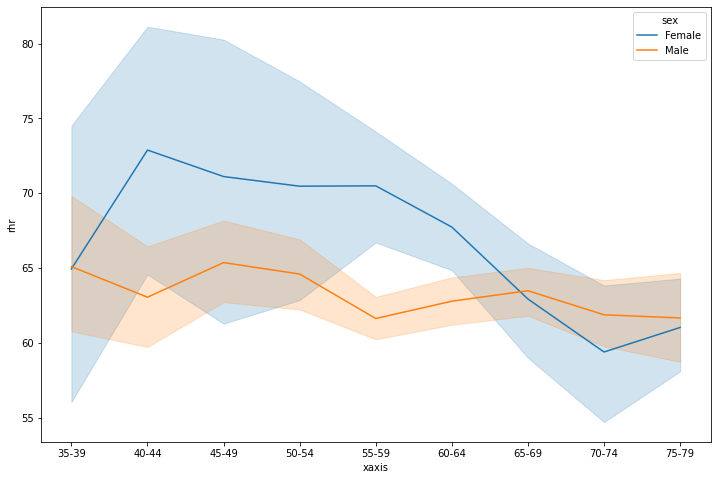

In [23]:
import seaborn as sns
from matplotlib import pyplot as plt

labels = sorted(np.unique(df.age_group))
df['xaxis'] = df.age_group.map(lambda x: labels.index(x)).astype('float')
plt.figure(figsize=(12, 8))
sns.lineplot(x='xaxis', y='rhr', hue='sex', data=df)
_ = plt.xticks(np.arange(len(labels)), labels)

### Clinical Conclusion


#### Questions 1 & 2
Summary statistics of Resting Heart Rate as split by gender:
      sex       mean    std_dev        q25        q75
  Female  65.965632  14.393868  57.744361  75.247986
    Male  63.016196  13.064686  53.782763  70.369667

#### Question 3
In comparison to men, women's heart rate is 3 BPM faster

#### Question 4 
The difference in general trends and patters between genders can be attributed to the following:
Men:
    i) Resting Heart Rate: Men usually have a slightly lower resting heart rate compared to women, often attributed to larger heart size which pumps           more blood
    ii) Age-Related Hypertension: Men may experience an increase in blood pressure earlier in life compared to women, which might impact heart rate.

Women:
    i) Menstrual Cycle: During various phases of the menstrual cycle, fluctuations in hormones like estrogen and progesterone can cause variations in heart rate.
    ii) Pregnancy: Pregnancy significantly affects the cardiovascular system, generally increasing heart rate to meet the increased demand for blood flow.
    iii) Menopause: The hormonal changes during menopause can lead to an increase in heart rate and sometimes lead to palpitations.

#### Question 5
Both Lifestyle/Demographics and medical/pathaological issues have a significant effect on this. For example lower socio-economic groups have a shorter lifespan and many such earlier deaths in men are due to cardic/circulatory issues. On the medical side certain heridiray conditons (Hypertension in meen for example) would have a systematic effect on the broader trends too.

#### Question 6
The different temportal trends and gender differences have been validated by this analysis.
